# 網路爬蟲-進階


上一堂課已經用 HTML 文件解說網路爬蟲的基本原理了，在一般的網站中都比上述實例複雜與困難。

# 1. 網路爬蟲實戰


## 1-1. 下載網站圖片

In [27]:
import bs4, requests, os

url = 'https://www.google.com.tw/'                  # Google網頁
html = requests.get(url)
print("網頁下載中 ...")
html.raise_for_status()                             # 驗證網頁是否下載成功                      
print("網頁下載完成")

destDir = 'GOOGLE_Download'                                # 設定未來儲存圖片的資料夾
if os.path.exists(destDir) == False:
    os.mkdir(destDir)                               # 建立資料夾供未來儲存圖片

objSoup = bs4.BeautifulSoup(html.text, 'lxml')      # 建立BeautifulSoup物件

imgTag = objSoup.select('img')                      # 搜尋所有圖片檔案
print("搜尋到的圖片數量 = ", len(imgTag))           # 列出搜尋到的圖片數量
if len(imgTag) > 0:                                 # 如果有找到圖片則執行下載與儲存
    for i in range(len(imgTag)):                    # 迴圈下載圖片與儲存
        imgUrl = imgTag[i].get('src')               # 取得圖片的路徑
        print("%s 圖片下載中 ... " % imgUrl)
        finUrl = url + imgUrl                       # 取得圖片在Internet上的路徑
        print("%s 圖片下載中 ... " % finUrl)
        picture = requests.get(finUrl)              # 下載圖片
        picture.raise_for_status()                  # 驗證圖片是否下載成功
        print("%s 圖片下載成功" % finUrl)

        # 先開啟檔案, 再儲存圖片
        pictFile = open(os.path.join(destDir, os.path.basename(imgUrl)), 'wb')
        for diskStorage in picture.iter_content(10240):
            pictFile.write(diskStorage)
        pictFile.close()                            # 關閉檔案                      

網頁下載中 ...
網頁下載完成
搜尋到的圖片數量 =  1
/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.3-law.gif 圖片下載中 ... 
https://www.google.com.tw//logos/doodles/2020/december-holidays-days-2-30-6753651837108830.3-law.gif 圖片下載中 ... 
https://www.google.com.tw//logos/doodles/2020/december-holidays-days-2-30-6753651837108830.3-law.gif 圖片下載成功


因為所搜尋到的圖片 imgURL 可能位在其它子資料夾，它的檔名前方有目錄路徑。

os.path.basename() 主要是忽略目錄路徑傳回程式檔名，這樣就可以避免因為需要在 desrDir 下開啟不存在的資料夾而產生錯誤。

In [ ]:
GOOGLE_Download\image\sample.jpg     #因為image資料夾不存在開啟時會有錯誤

有了 os.path.basename()，傳回結果是:
    
GOOGLE_Download\sample.jpg           #可以正常開啟此檔案

### ******在上一堂課有介紹有些網站的伺服器會擋住網路爬蟲的需求，所以必須在 Python 程式前方加上偽裝成伺服器的 header 宣告，下列是這個程式的實際應用。******

In [29]:
import bs4, requests, os

headers = { 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64)\
            AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.101\
            Safari/537.36', }

url = 'http://aaa.24ht.com.tw/'                     # 這個伺服器會擋住網頁
html = requests.get(url, headers=headers)           
print("網頁下載中 ...")
html.raise_for_status()                             # 驗證網頁是否下載成功                      
print("網頁下載完成")

destDir = 'EX_Dir'                                # 設定儲存資料夾
if os.path.exists(destDir) == False:
    os.mkdir(destDir)                               # 建立目錄供未來儲存圖片

objSoup = bs4.BeautifulSoup(html.text, 'lxml')      # 建立BeautifulSoup物件

imgTag = objSoup.select('img')                      # 搜尋所有圖片檔案
print("搜尋到的圖片數量 = ", len(imgTag))           # 列出搜尋到的圖片數量
if len(imgTag) > 0:                                 # 如果有找到圖片則執行下載與儲存
    for i in range(len(imgTag)):                    # 迴圈下載圖片與儲存
        imgUrl = imgTag[i].get('src')               # 取得圖片的路徑
        print("%s 圖片下載中 ... " % imgUrl)
        finUrl = url + imgUrl                       # 取得圖片在Internet上的路徑
        print("%s 圖片下載中 ... " % finUrl)
        picture = requests.get(finUrl, headers=headers) # 下載圖片
        picture.raise_for_status()                  # 驗證圖片是否下載成功
        print("%s 圖片下載成功" % finUrl)

        # 先開啟檔案, 再儲存圖片
        pictFile = open(os.path.join(destDir, os.path.basename(imgUrl)), 'wb')
        for diskStorage in picture.iter_content(10240):
            pictFile.write(diskStorage)
        pictFile.close()                            # 關閉檔案

網頁下載中 ...
網頁下載完成
搜尋到的圖片數量 =  3
hung.jpg 圖片下載中 ... 
http://aaa.24ht.com.tw/hung.jpg 圖片下載中 ... 
http://aaa.24ht.com.tw/hung.jpg 圖片下載成功
travel.jpg 圖片下載中 ... 
http://aaa.24ht.com.tw/travel.jpg 圖片下載中 ... 
http://aaa.24ht.com.tw/travel.jpg 圖片下載成功
html5.jpg 圖片下載中 ... 
http://aaa.24ht.com.tw/html5.jpg 圖片下載中 ... 
http://aaa.24ht.com.tw/html5.jpg 圖片下載成功


## 1-2. 網路爬蟲-以大樂透為例

select() 主要是以 CSS 選擇器(selector)的觀念尋找元素，如果找到回傳的是串列(list)，如果找不到則傳回空串列。下列是使用實例:

+ objSoup.select('p'):找尋所有< p >標籤的元素。
    
+ objsoup.select('img'):找尋所有 < img >標籤的元素。
    
+ objsoup.select('.happy'):找尋所有 CSS class 屬性為 happy 的元素。

+ objsoup.select('#author'):找尋所有 CSS id 屬性為 author 的元素。

+ objSoup.select('p #author'):找尋所有 < p > 且id 屬性為 author 的元素。

+ objSoup.select('p .happy'):找尋所有 < p > 且 class 屬性為 happy 的元素。

+ objSoup.select('div strong'):找尋所有在 < section > 元素内的 < strong > 元素。

+ objsoup.select('div > strong'):所有在 < section > 内的 < strong > 元素，中間沒有其他元素。

+ objSoup.select('input[name]') :找尋所有 < input > 標籤且有 name 屬性的元素。

### ******找出台灣彩券公司最新一期威力彩開獎結果。******

這個程式在設計時，我們先找尋Class是 "contents_box02"，因為我們發現這裡會記錄威力彩最新一期的開獎結果。

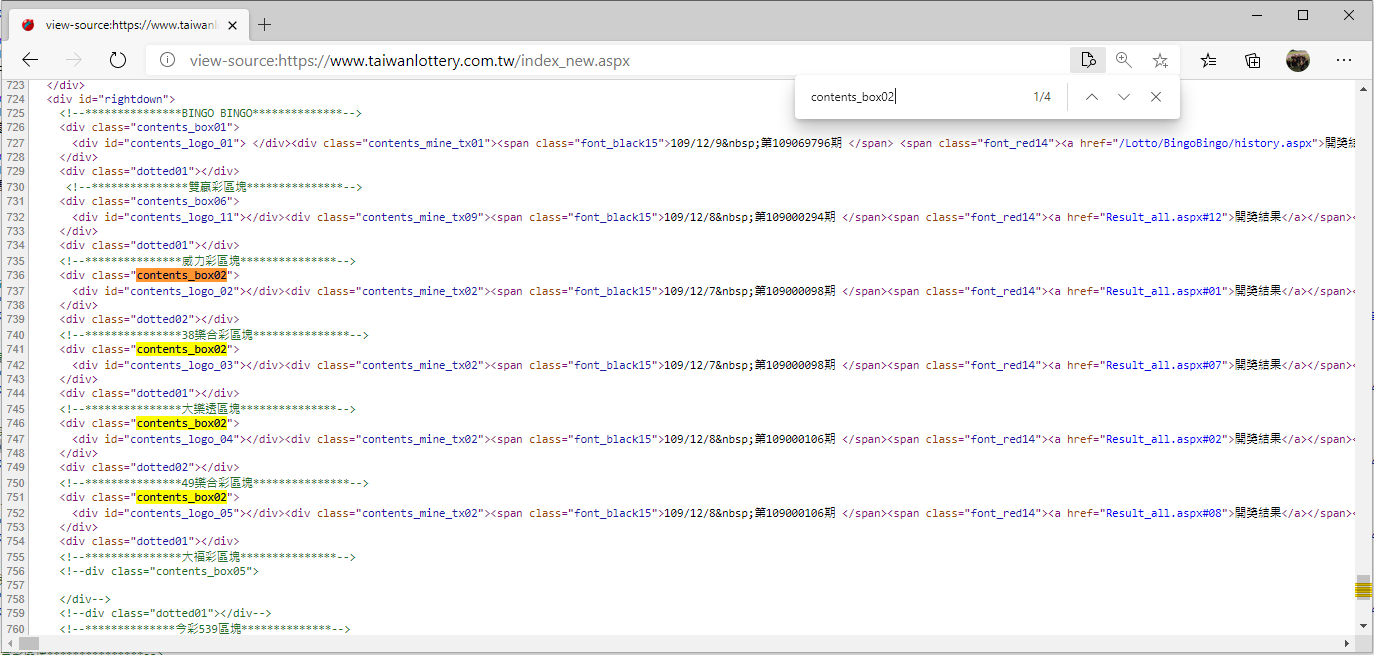

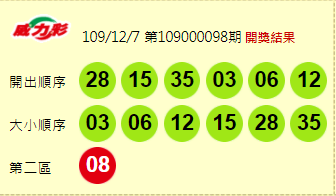

In [53]:
import bs4, requests

url = 'http://www.taiwanlottery.com.tw'
html = requests.get(url)
print("網頁下載中 ...")
html.raise_for_status()                             # 驗證網頁是否下載成功                      
print("網頁下載完成")

objSoup = bs4.BeautifulSoup(html.text, 'lxml')      # 建立BeautifulSoup物件

dataTag = objSoup.select('.contents_box02')         # 尋找class是contents_box02
print("串列長度", len(dataTag))
for i in range(len(dataTag)):                       # 列出含contents_box02的串列                 
    print(dataTag[i])
        
# 找尋開出順序與大小順序的球
balls = dataTag[0].find_all('div', {'class':'ball_tx ball_green'})
print("開出順序 : ", end='')
for i in range(6):                                  # 前6球是開出順序
    print(balls[i].text, end='   ')

print("\n大小順序 : ", end='')
for i in range(6,len(balls)):                       # 第7球以後是大小順序
    print(balls[i].text, end='   ')

# 找出第二區的紅球                   
redball = dataTag[0].find_all('div', {'class':'ball_red'})
print("\n第二區   :", redball[0].text)

網頁下載中 ...
網頁下載完成
串列長度 4
<div class="contents_box02">
<div id="contents_logo_02"></div><div class="contents_mine_tx02"><span class="font_black15">109/12/7 第109000098期 </span><span class="font_red14"><a href="Result_all.aspx#01">開獎結果</a></span></div><div class="contents_mine_tx04">開出順序<br/>大小順序<br/>第二區</div><div class="ball_tx ball_green">28 </div><div class="ball_tx ball_green">15 </div><div class="ball_tx ball_green">35 </div><div class="ball_tx ball_green">03 </div><div class="ball_tx ball_green">06 </div><div class="ball_tx ball_green">12 </div><div class="ball_tx ball_green">03 </div><div class="ball_tx ball_green">06 </div><div class="ball_tx ball_green">12 </div><div class="ball_tx ball_green">15 </div><div class="ball_tx ball_green">28 </div><div class="ball_tx ball_green">35 </div><div class="ball_red">08 </div>
</div>
<div class="contents_box02">
<div id="contents_logo_03"></div><div class="contents_mine_tx02"><span class="font_black15">109/12/7 第109000098期 </span><span class="

# 2. Selenium 控制瀏覽器

在之前有介紹有些網頁伺服器會阻擋網路爬蟲讀取網頁内容，我們可以使用 headers 的宣告將爬蟲程式偽裝成瀏覽器，這樣我們就可以克服讀取網頁内容的障礙。

Selenium 功能可以控制瀏覽器，所以當使用 Selenium 當爬蟲工具時，網路伺服器會認為來讀取資料的是瀏覽器，所以不會有被阻擋無法讀取網頁 HTML 原始檔的問題。

當然 Selenium 功能不僅如此，可以使用它按連結，填寫登入資訊，甚至訂票系統、搶購系統⋯等。

## 2-1. Selenium 工具前的安裝工作

如果想要在 Windows 系統内順利使用 selenium 執行工作，必須安裝下列三項工具以及一個設定。

+ 1. Selenium 工具。
+ 2. 瀏覽器，使用 Selenium 市面上最見是安裝 Firefox，也可以是 Chrome 或 IE 。
+ 3. 驅動程式，這是指 Selenium 驅動瀏覽器的程式。

## 2-2. 安裝 Selenium

In [54]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
未來程式導入的宣告稍微不一樣如下所示:
    
from selenium import webdriver

## 2-3. 安裝瀏覽器

1. 可以至 https://www.mozilla.org 網頁下載 Firefox:
2. 可以至 https://www.google.com/intl/zh-TW/chrome/ 網頁下載 Google Chrome:

## 2-4. 錯誤的實例

目前許多文件皆書寫安裝完上述兩項後，就可以使用 Selenium 設計網路爬蟲程式了，下列是普遍書寫的第一個 Selenium 程式。

In [55]:
from selenium import webdriver

browser = webdriver.Chrome()
print(type(browser))

WebDriverException: Message: 'geckodriver' executable needs to be in PATH. 


據說上述程式在Linux系統上可正常執行。

不過以上錯誤原因是指 geckodriver 的驅動程式不在 PATH 路徑内，所以產生錯誤。

## 2-5. 驅動程式的安裝

驅動程式的安裝分成下列步驟:

+ 1. 安裝驅動程式與解壓縮。
+ 2. 將驅動程式放在 PATH 路徑内。
+ 3. 將驅動程式路徑放在 Python 程式内。

驅動程式下載網址:

+ 1. Firefox: https://github.com/mozilla/geckodriver/releases
+ 2. Google Chrome: https://chromedriver.chromium.org/downloads

## 2-6. 獲得 webdriver 的物件型態

使用 Selenium 的第一歩是獲得 webdriver 物件。

In [63]:
from selenium import webdriver

browser = webdriver.Chrome()
print(type(browser))

<class 'selenium.webdriver.chrome.webdriver.WebDriver'>


## 2-7. 擷取網頁

Selenium Webdriver API 常用的屬性和方法如下:

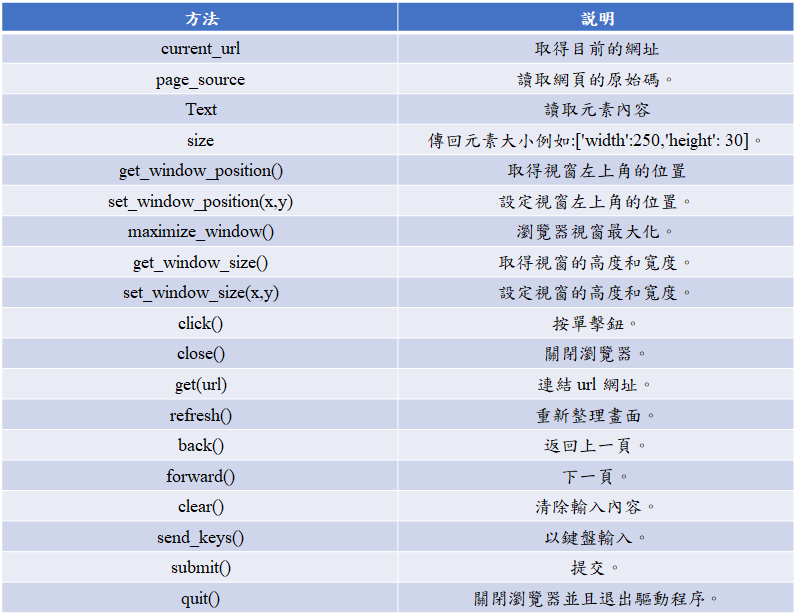

獲得 browser 物件後，可以使用 get() 讓瀏覽器連上網頁。

In [64]:
from selenium import webdriver

browser = webdriver.Chrome()
url = 'https://www.mcu.edu.tw/'
browser.get(url)                # 網頁下載至瀏覽器

傳回 WebElemnt 元素時，可以使用 click() 方法，如果執行此方法相當於我們再點選這個傳回的元素。

如果傳回的元素是超連結的文字，這樣可以產生按此超連結的結果。

進入銘傳大學網頁，經過5秒後，設計程式自動點選 "電子公文及表單" 超連結。

In [72]:
from selenium import webdriver
import time

browser = webdriver.Chrome()
url = 'https://www.mcu.edu.tw/'
browser.get(url)                # 網頁下載至瀏覽器

eleLink = browser.find_element_by_link_text('電子公文及表單')
print(type(eleLink))            # 列印eleLink資料類別
time.sleep(5)                   # 暫停5秒
eleLink.click()

<class 'selenium.webdriver.remote.webelement.WebElement'>


我們可以找尋 < input > 元素 type 是 "text" 或是找尋 < textara > 元素，然後使用 send_keys() 方法，就可以填寫表單。

填寫完成後可以使用 submit() 方法，將表單送出。

In [78]:
from selenium import webdriver
import time

browser = webdriver.Chrome()
url = 'http://www.mcut.edu.tw/?Lang=en'
browser.get(url)                    # 網頁下載至瀏覽器

txtBox = browser.find_element_by_id('hdSchKey')
txtBox.send_keys('王永慶')          # 輸入表單資料
time.sleep(5)                       # 暫停5秒
txtBox.submit()                     # 送出表單


### ****** 以台鐵時刻表查詢為例 ******

In [91]:
# twhrtimetable.py
from selenium import webdriver
# 臺鐵時刻表查詢網站
url = 'https://www.railway.gov.tw/tra-tip-web/tip/tip001/tip112/gobytime'
ss='3300-臺中'      #出發站
es='1000-臺北'      #到達站

# 建立瀏覽器物件開啟網站
driver = webdriver.Chrome()
driver.get(url)
#輸入出發站
driver.find_element_by_id('startStation').send_keys(ss) 
#輸入到達站
driver.find_element_by_id('endStation').send_keys(es)   

driver.find_element_by_name('query').click() #按查詢鈕

## 2-8. 尋找 HTML 文件的元素

如果我們想要和網頁互動，例如:按下按鈕、超連結、輸入文字等，就必須先取得網頁元素，才能對這些特定的網頁元素進行操作。

Selenium Webdriver API 提供多種取得網頁元素的方法・如下:

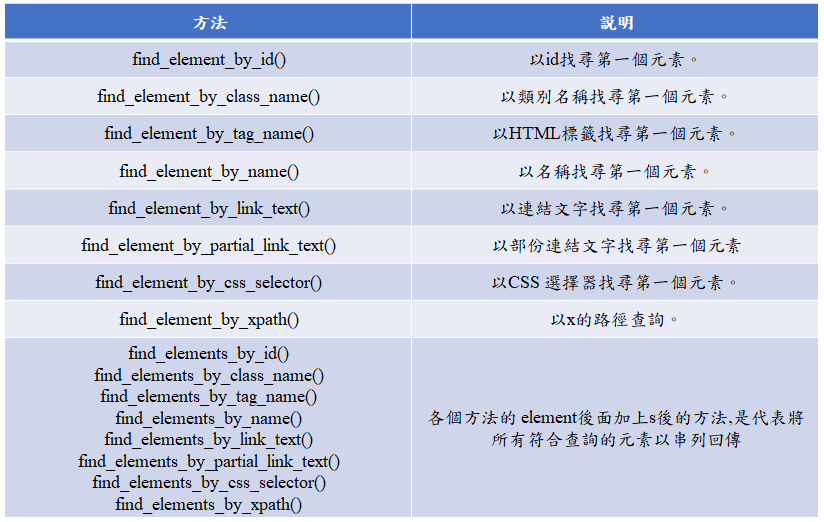

### ******列出找不到元素，造成程式結束的實例。******

In [66]:
from selenium import webdriver

browser = webdriver.Chrome()
url = 'http://aaa.24ht.com.tw'
browser.get(url)                # 網頁下載至瀏覽器

tag = browser.find_element_by_id('main')
print(tag.tag_name)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="main"]"}
  (Session info: chrome=87.0.4280.88)


### ******找不到符合條件的元素時，執行例外處理。******

In [67]:
from selenium import webdriver

browser = webdriver.Chrome()
url = 'http://aaa.24ht.com.tw'
browser.get(url)                # 網頁下載至瀏覽器

try:
    tag = browser.find_element_by_id('main')
    print(tag.tag_name)
except:
    print("沒有找到相符的元素")

沒有找到相符的元素


### ******以 http://aaa.24ht.com.tw 網站為例，抓取不同元素的應用。******

In [68]:
from selenium import webdriver

browser = webdriver.Chrome()
url = 'http://aaa.24ht.com.tw'
browser.get(url)                # 網頁下載至瀏覽器

tag1 = browser.find_element_by_tag_name('title')        # 傳回<title>
print("標籤名稱 = %s, 內容是 = %s " % (tag1.tag_name, tag1.text))

tag2 = browser.find_element_by_id('author')             # 傳回<h1>
print("\n標籤名稱 = %s, 內容是 = %s " % (tag2.tag_name, tag2.text))

print()
tag3 = browser.find_elements_by_id('content')           # 傳回<h1>
for i in range(len(tag3)):
    print("標籤名稱 = %s, 內容是 = %s " % (tag3[i].tag_name, tag3[i].text))

print()
tag4 = browser.find_elements_by_tag_name('p')           # 傳回<p>
for i in range(len(tag4)):
    print("標籤名稱 = %s, 內容是 = %s " % (tag4[i].tag_name, tag4[i].text))

print()
tag5 = browser.find_elements_by_tag_name('img')         # 傳回<img>
for i in range(len(tag5)):
    print("標籤名稱 = %s, 內容是 = %s " % (tag5[i].tag_name, tag5[i].get_attribute('src')))

標籤名稱 = title, 內容是 =  

標籤名稱 = h1, 內容是 = 洪錦魁 

標籤名稱 = h1, 內容是 = 一個人的極境旅行 - 南極大陸北極海 
標籤名稱 = h1, 內容是 = HTML5+CSS3王者歸來 

標籤名稱 = p, 內容是 = 2015/2016年洪錦魁一個人到南極 
標籤名稱 = p, 內容是 = 本書講解網頁設計使用HTML5+CSS3 

標籤名稱 = img, 內容是 = http://aaa.24ht.com.tw/hung.jpg 
標籤名稱 = img, 內容是 = http://aaa.24ht.com.tw/travel.jpg 
標籤名稱 = img, 內容是 = http://aaa.24ht.com.tw/html5.jpg 


### Homework #1 請設計一個爬蟲程式，印出最新一期的開獎號碼。

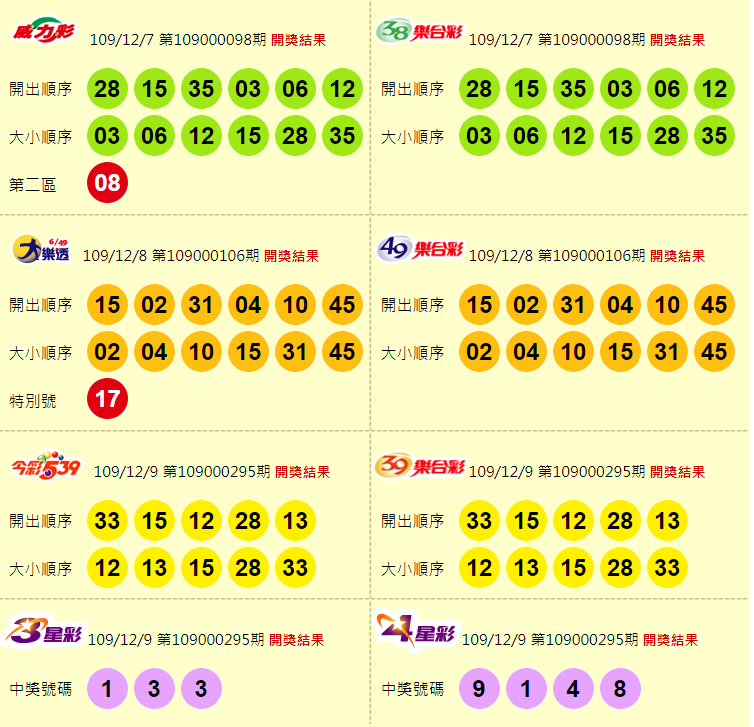

### Homework #2 請設計一個 Selenium 爬蟲程式，請開啟天瓏書局網站，搜尋字串 "Pythpn"，然後列出搜尋結果。